In [1]:
import numpy as np
from matplotlib import pyplot as plt
def generate_triangular_lattice(H=500, W=500, spacing=30, sigma=2.5, amplitude=1.0, center=None):
    """
    Generate a triangular lattice pattern as a 2D numpy array.

    Parameters
    ----------
    H, W : int
        Height and width of the output array.
    spacing : float
        Distance between nearest lattice points (in pixels).
    sigma : float
        Gaussian peak width (standard deviation in pixels).
    amplitude : float
        Peak height.
    center : tuple(float, float) or None
        Center of the lattice in (x, y) pixel coordinates.
        Can be fractional (subpixel precision). If None, defaults to image center.

    Returns
    -------
    data : np.ndarray
        2D numpy array of shape (H, W) with normalized values in range [0, 1].
    """
    # Lattice basis vectors (triangular symmetry)
    a1 = np.array([1.0, 0.0])
    a2 = np.array([0.5, np.sqrt(3) / 2])

    # Coordinate grid
    y = np.arange(H)
    x = np.arange(W)
    X, Y = np.meshgrid(x, y)

    # Set center
    if center is None:
        center = (W / 2, H / 2)
    center = np.array(center, dtype=float)  # allow subpixel

    # Output array
    data = np.zeros((H, W), dtype=float)

    # Number of lattice points in each direction
    n_i = int(W / spacing) + 6
    n_j = int(H / spacing) + 6

    # Generate Gaussian peaks
    for i in range(-n_i, n_i + 1):
        for j in range(-n_j, n_j + 1):
            pos = (i * a1 + j * a2) * spacing + center
            px, py = pos
            # Skip points too far outside image
            if px < -3*sigma or px > W + 3*sigma or py < -3*sigma or py > H + 3*sigma:
                continue
            rr = (X - px) ** 2 + (Y - py) ** 2
            data += amplitude * np.exp(-rr / (2 * sigma ** 2))

    # Normalize to 0..1
    data = (data - data.min()) / (data.max() - data.min())

    return data

In [191]:
data = generate_triangular_lattice(H=500, W=500, spacing=10, sigma=9, amplitude=1.0, center=(0,0))

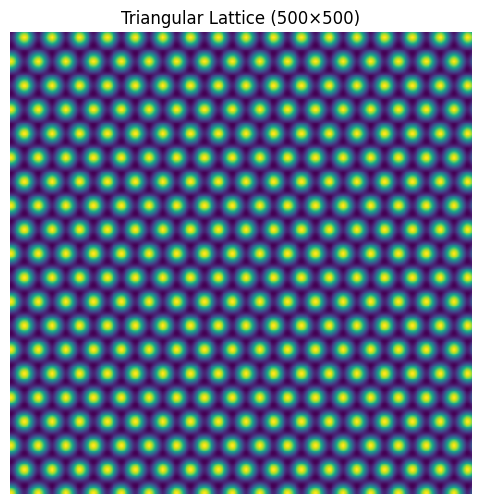

In [188]:
plt.figure(figsize=(6, 6))
plt.imshow(data, origin='lower', cmap='viridis', interpolation='nearest')
plt.title("Triangular Lattice (500×500)")
plt.axis('off')
plt.show()

In [192]:
data.max()

np.float64(1.0)

In [174]:
H=500 
W=500
spacing=30
sigma=9
 
I_atom = generate_triangular_lattice(H=500, W=500, spacing=30, sigma=sigma, amplitude=1.0, center=(0,0))
I_CDW = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sigma*3, amplitude=1.0, center=(30+15,15/np.sqrt(3)))
I_CDW2 = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sigma, amplitude=1.0, center=(30+15,105/np.sqrt(3)))
# I_CDW = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sigma*3, amplitude=1.0, center=(0,0))

I_comb = -I_atom + I_CDW*3 + I_CDW2*1.5

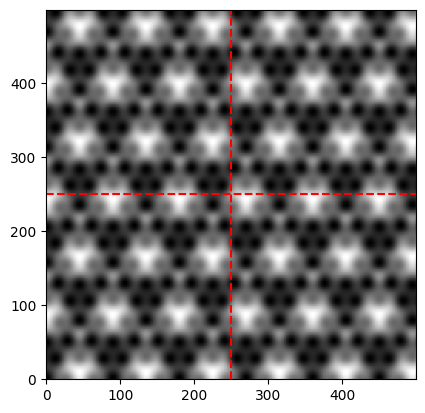

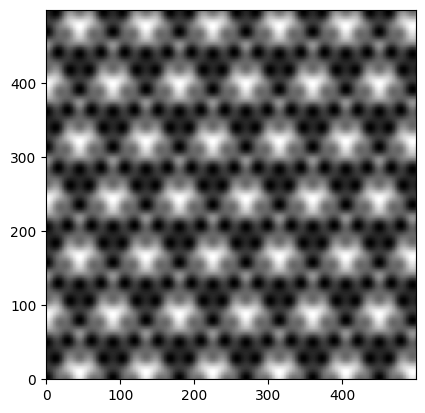

In [175]:
plt.imshow(I_comb, origin='lower', cmap='gray', interpolation='nearest')
ax = plt.gca()
ax.set_aspect('equal')
ax.axvline(250, color='red', linestyle='--')
ax.axhline(250, color='red', linestyle='--')

plt.show()
plt.imshow(I_comb, origin='lower', cmap='gray', interpolation='nearest')

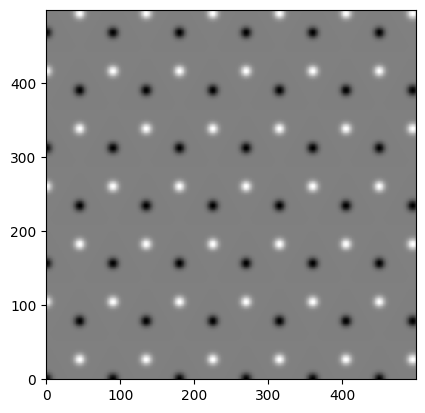

In [194]:
sig =5
I_CDW_yin = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sig, center=(0,0))
I_CDW_yang = generate_triangular_lattice(H=500, W=500, spacing=90, sigma=sig,  center=(45,15*np.sqrt(3)))
I_CDW = I_CDW_yang - I_CDW_yin
plt.imshow(I_CDW, origin='lower', cmap='gray', interpolation='nearest')

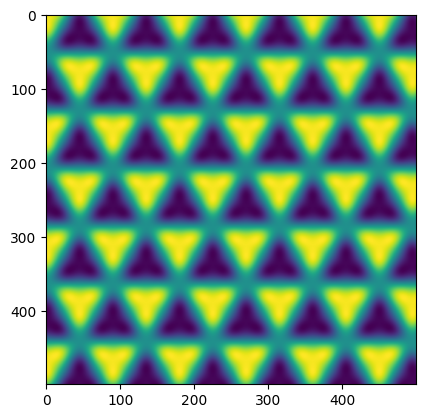

In [227]:
import numpy as np

def get_angle_vector(angle_deg):
    theta = np.radians(angle_deg)
    return np.array([np.cos(theta), np.sin(theta)])
cs = get_angle_vector

cs(60)
r3 = np.sqrt(3)
H=500 
W=500
spacing=30
sigma=15
posYinYangs = np.array(((0,0),
                        r3*30*cs(30)))
shifts = 15*r3*np.array((
    cs(210),
    cs(330),
    cs(90)
))*0.9 



img = np.zeros((H,W))
for iyy in range(2):
    posYinYang = posYinYangs[iyy] 
    for ishift in range(3):
        shift = shifts[ishift]
        center = posYinYang + shift * (-2*iyy+1)
        corrugation_now = generate_triangular_lattice(H=H, W=W, spacing=spacing*3, sigma=sigma,  center=center)
        img += corrugation_now* (-2*iyy+1)
        
plt.imshow(img)

In [ ]:
posYinYangs = np.array(((0,0),
                        (45,15*np.sqrt(3))))
print(posYinYangs)                        


print(posYinYangs)                        

[[ 0.          0.        ]
 [45.         25.98076211]]
[[ 0.          0.        ]
 [45.         25.98076211]]


In [205]:
posYinYangs

array([[0.       , 0.       ],
       [0.8660254, 0.5      ]])

In [197]:
shifts[0]


array([-12.        ,  -6.92820323])

In [ ]:
H=500 
W=500
SPACING=30
CNTR_LATTICE =np.array([0,0])
from_a12_to_xy = np.array([[1,0],[1/2,np.sqrt(3)/2]])


cntr_CDW =np.array([0,0])
atom_H = [0,0]
atom_A = []
atom_C = []


In [142]:
from_a12_to_xy = np.array([[1,0],
                           [1/2,np.sqrt(3)/2]]).T
T = from_a12_to_xy
v =  np.array([1,0])

In [ ]:
pos_a12_atomH = [0,0]
pos_a12_atomA = []
pos_a12_atomC

array([1., 0.])

In [146]:
import pandas as pd

df = pd.DataFrame(
    index=["atom_H", "atom_C","atom_A", "cdw_M", "cdw_L", "cdw_H"],
    columns=["I", "sig"]
)


In [145]:
df

,a12_pos,xy_pos,I,sig
atom_H,NaN,NaN,NaN,NaN
atom_C,NaN,NaN,NaN,NaN
cdw_M,NaN,NaN,NaN,NaN
cdw_L,NaN,NaN,NaN,NaN
cdw_H,NaN,NaN,NaN,NaN


array([[17],
       [39]])